In [33]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [36]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [37]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [38]:
#Import the requests library
import requests
#Import the API key
from config import weather_api_key

In [39]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c112c21bc455a00523f84cdac771de58


In [40]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [41]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [42]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [43]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  
    
    


Processing Record 1 of Set 13 | albany
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | qaanaaq
Processing Record 4 of Set 13 | karratha
Processing Record 5 of Set 13 | luderitz
Processing Record 6 of Set 13 | dikson
Processing Record 7 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 13 | mataura
Processing Record 9 of Set 13 | coquimbo
Processing Record 10 of Set 13 | tessalit
Processing Record 11 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 13 | catio
Processing Record 13 of Set 13 | lebu
Processing Record 14 of Set 13 | atuona
Processing Record 15 of Set 13 | minyar
Processing Record 16 of Set 13 | norman wells
Processing Record 17 of Set 13 | dayong
Processing Record 18 of Set 13 | pisco
Processing Record 19 of Set 13 | bredasdorp
Processing Record 20 of Set 13 | louisbourg
City not found. Skipping...
Processing Record 21 of Set 13 | pevek
Processing Record 22 of Set 13 | pocao de pedras
Processin

Processing Record 35 of Set 16 | mattru
Processing Record 36 of Set 16 | paamiut
Processing Record 37 of Set 16 | redmond
Processing Record 38 of Set 16 | sembakung
Processing Record 39 of Set 16 | amherst
Processing Record 40 of Set 16 | voh
Processing Record 41 of Set 16 | kameshkovo
Processing Record 42 of Set 16 | port moresby
Processing Record 43 of Set 16 | tuktoyaktuk
Processing Record 44 of Set 16 | charters towers
Processing Record 45 of Set 16 | perth
Processing Record 46 of Set 16 | sinjar
Processing Record 47 of Set 16 | nanortalik
Processing Record 48 of Set 16 | kununurra
Processing Record 49 of Set 16 | yarada
Processing Record 50 of Set 16 | ugoofaaru
Processing Record 1 of Set 17 | camacha
Processing Record 2 of Set 17 | isangel
Processing Record 3 of Set 17 | huarmey
Processing Record 4 of Set 17 | yellowknife
Processing Record 5 of Set 17 | codrington
Processing Record 6 of Set 17 | college
Processing Record 7 of Set 17 | san rafael
Processing Record 8 of Set 17 | re

Processing Record 24 of Set 20 | laguna
Processing Record 25 of Set 20 | play cu
City not found. Skipping...
Processing Record 26 of Set 20 | oksfjord
Processing Record 27 of Set 20 | cheuskiny
City not found. Skipping...
Processing Record 28 of Set 20 | brewster
Processing Record 29 of Set 20 | saint george
Processing Record 30 of Set 20 | the valley
Processing Record 31 of Set 20 | lasa
Processing Record 32 of Set 20 | saint anthony
Processing Record 33 of Set 20 | santo antonio do ica
Processing Record 34 of Set 20 | saint-augustin
Processing Record 35 of Set 20 | ust-maya
Processing Record 36 of Set 20 | satitoa
City not found. Skipping...
Processing Record 37 of Set 20 | timra
Processing Record 38 of Set 20 | svetlyy
Processing Record 39 of Set 20 | san juan
Processing Record 40 of Set 20 | fredericton
Processing Record 41 of Set 20 | zeya
Processing Record 42 of Set 20 | shingu
Processing Record 43 of Set 20 | te anau
Processing Record 44 of Set 20 | dabhol
Processing Record 45 o

Processing Record 11 of Set 24 | caernarfon
Processing Record 12 of Set 24 | black river
Processing Record 13 of Set 24 | bom jesus
Processing Record 14 of Set 24 | panuco
Processing Record 15 of Set 24 | wadi maliz
Processing Record 16 of Set 24 | cockburn town
Processing Record 17 of Set 24 | samarai
Processing Record 18 of Set 24 | bang saphan
Processing Record 19 of Set 24 | warqla
City not found. Skipping...
Processing Record 20 of Set 24 | kombissiri
Processing Record 21 of Set 24 | wewak
Processing Record 22 of Set 24 | santander
Processing Record 23 of Set 24 | luba
Processing Record 24 of Set 24 | bambous virieux
Processing Record 25 of Set 24 | somerville
Processing Record 26 of Set 24 | katsuura
Processing Record 27 of Set 24 | karaul
City not found. Skipping...
Processing Record 28 of Set 24 | kalabo
Processing Record 29 of Set 24 | formoso do araguaia
City not found. Skipping...
Processing Record 30 of Set 24 | borovichi
Processing Record 31 of Set 24 | sarapulka
Processin

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,46.00,100,98,4.68,US,2020-10-29 04:32:57
1,Ushuaia,-54.80,-68.30,42.80,87,90,27.51,AR,2020-10-29 04:31:25
2,Qaanaaq,77.48,-69.36,7.70,72,2,8.99,GL,2020-10-29 04:32:57
3,Karratha,-20.74,116.85,85.96,46,1,11.88,AU,2020-10-29 04:28:11
4,Luderitz,-26.65,15.16,61.52,57,97,12.01,NA,2020-10-29 04:32:57
5,Dikson,73.51,80.55,3.18,87,4,18.99,RU,2020-10-29 04:32:57
6,Mataura,-46.19,168.86,66.00,64,33,4.00,NZ,2020-10-29 04:32:57
7,Coquimbo,-29.95,-71.34,53.60,81,0,4.70,CL,2020-10-29 04:29:38
8,Tessalit,20.20,1.01,73.89,19,0,11.05,ML,2020-10-29 04:31:16
9,Catio,11.28,-15.25,77.20,89,2,4.16,GW,2020-10-29 04:32:58


In [45]:
#Reoder columns in for ease of reading
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-10-29 04:32:57,42.60,-73.97,46.00,100,98,4.68
1,Ushuaia,AR,2020-10-29 04:31:25,-54.80,-68.30,42.80,87,90,27.51
2,Qaanaaq,GL,2020-10-29 04:32:57,77.48,-69.36,7.70,72,2,8.99
3,Karratha,AU,2020-10-29 04:28:11,-20.74,116.85,85.96,46,1,11.88
4,Luderitz,NA,2020-10-29 04:32:57,-26.65,15.16,61.52,57,97,12.01
5,Dikson,RU,2020-10-29 04:32:57,73.51,80.55,3.18,87,4,18.99
6,Mataura,NZ,2020-10-29 04:32:57,-46.19,168.86,66.00,64,33,4.00
7,Coquimbo,CL,2020-10-29 04:29:38,-29.95,-71.34,53.60,81,0,4.70
8,Tessalit,ML,2020-10-29 04:31:16,20.20,1.01,73.89,19,0,11.05
9,Catio,GW,2020-10-29 04:32:58,11.28,-15.25,77.20,89,2,4.16


In [50]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [55]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603946460.1207337

In [56]:
today =  time.strftime("%x")
today

'10/28/20'

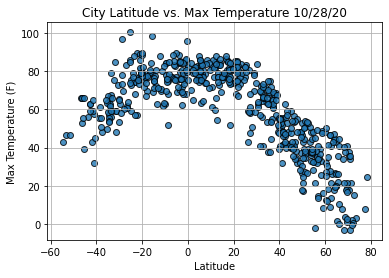

In [57]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

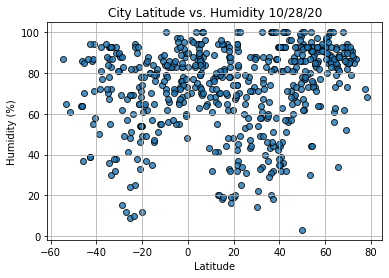

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


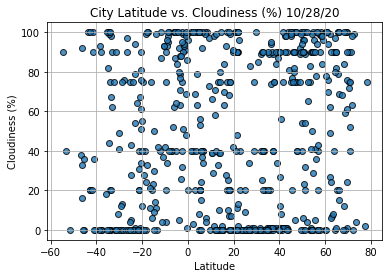

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

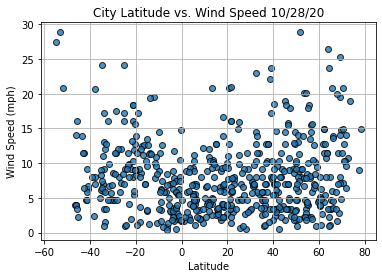

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
